In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\PARAS/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
862,ham,"Sorry, I guess whenever I can get a hold of my...",NaN,NaN,NaN
4234,spam,FREEMSG: Our records indicate you may be entit...,NaN,NaN,NaN
5090,ham,"St andre, virgil's cream",NaN,NaN,NaN
421,spam,Someone has contacted our dating service and e...,NaN,NaN,NaN
611,ham,Its a valentine game. . . Send dis msg to all ...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

data cleaning will be done the first
EDA
Text Preprcoessing
Model building
Evaluation
Imporevemnet
Website
Deploy

Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Drop the lat 3 columns

In [7]:
print(df.columns)




Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)


In [9]:
print(df.columns.tolist())


['v1', 'v2']


In [10]:
df.sample(5)

,v1,v2
949,ham,Is that what time you want me to come?
2885,ham,No probs hon! How u doinat the mo?
311,spam,Think ur smart ? Win å£200 this week in our we...
3079,ham,S.s:)i thinl role is like sachin.just standing...
5137,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...


In [11]:
#Eenaming the columns-
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [12]:
df.sample()

,target,text
2864,ham,He says hi and to get your ass back to south t...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df.head ()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()#Thus no missing values in here

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df=df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

#EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

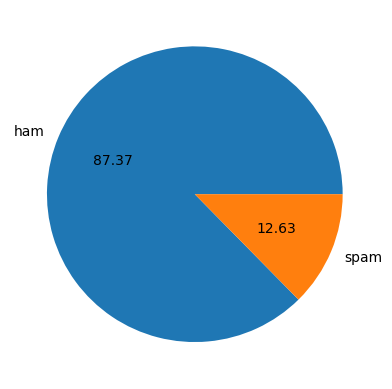

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
#Data here is Definately imbalnced

In [24]:
import nltk#Natural lnaguage tool kit

In [25]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\PARAS/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We are doing all this to take out the number of characters in the code

In [27]:
print(df.columns)  # Find the exact case
df['num_characters']=df['text'].apply(len)  # Example adjustment for capitalization


Index(['target', 'text'], dtype='object')


In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#The number of words

In [30]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #This is used to determine the number of words in the dataset

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#This is for ham messages in the code cause of leabel encoder
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#Spam
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

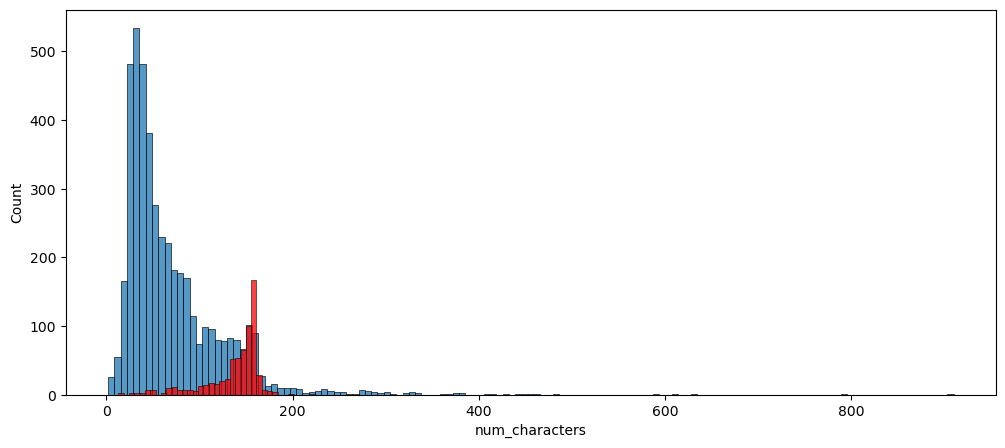

In [38]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

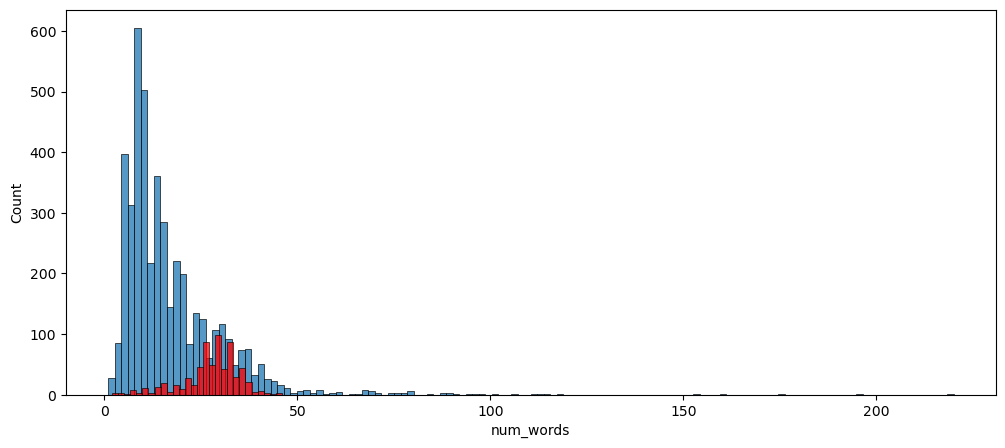

In [39]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


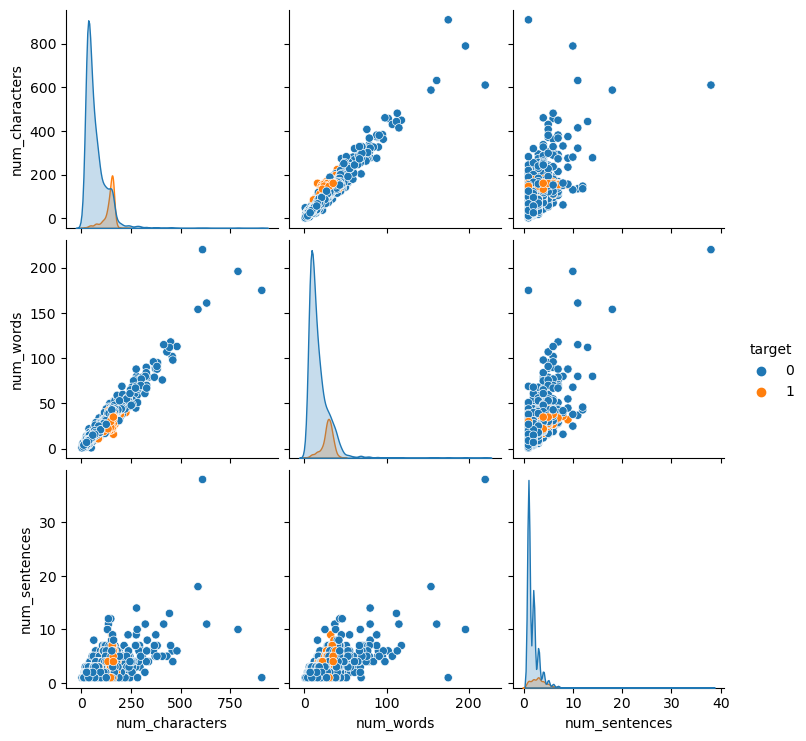

In [40]:
sns.pairplot(df,hue='target')

In [41]:
#Correlation coffieicent 
# Drop the 'text' column
df_numeric = df.drop(columns=['text'])

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

print("Correlation Matrix (without 'text'):")
print(correlation_matrix)


Correlation Matrix (without 'text'):
                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


In [42]:
correlation_matrix

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [43]:
# Filter out only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation on numeric columns only
correlation_matrix = numeric_df.corr()
ok_matrix=df.drop(columns=['text'])

print(correlation_matrix)


                num_characters  num_words  num_sentences
num_characters        1.000000   0.965760       0.624139
num_words             0.965760   1.000000       0.679971
num_sentences         0.624139   0.679971       1.000000


In [44]:
# df['text'] = pd.to_numeric(df['text'], errors='coerce')

In [45]:
numeric_df = numeric_df.dropna()  # Drops rows with NaN values
correlation_matrix = numeric_df.corr()


In [46]:
print(df.head())


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1  


In [47]:
#3. Data Preprocessing is done from here on


In [48]:
#lower case
#tokenization
#removing special characters
#removing stop wprds and punnction
#stemming

In [49]:
pip install nltk 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
import nltk
nltk.download('stopwords', download_dir='C:/Users/PARAS/nltk_data')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/PARAS/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    text = nltk.word_tokenize(text)  # Tokenize text into words
    y = []

    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Perform stemming
    for i in text:
        y.append(ps.stem(i))
    
    # Return the transformed text
    return ' '.join(y)

# Test the function
print(transform_text('I loved the YT Videos on Machine Learning'))


love yt video machin learn


[nltk_data] Downloading package punkt to C:\Users\PARAS/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARAS/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
transform_text('I loved the YT Videos on machine Learning.How about you?')

'love yt video machin'

In [54]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [55]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [57]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [60]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('thinking')

'think'

In [61]:
df['transformed_text']=df['text'].apply(transform_text)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [64]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

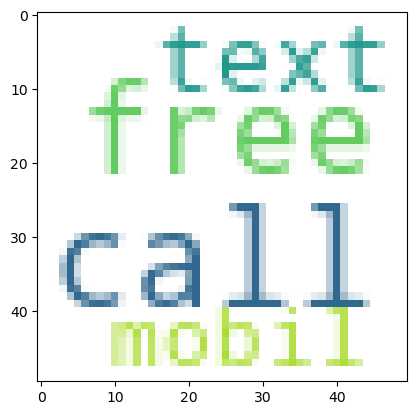

In [65]:
plt.imshow(spam_wc)

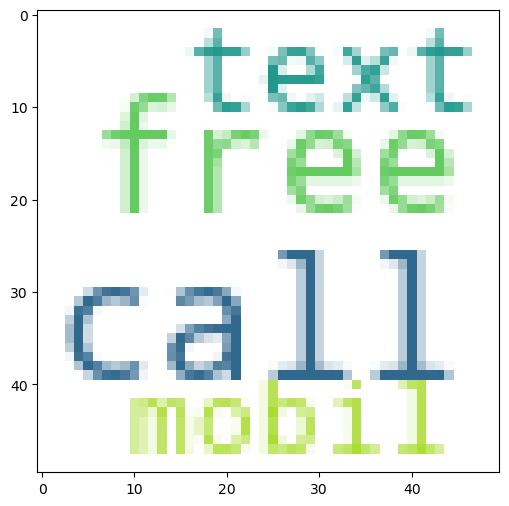

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [67]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))

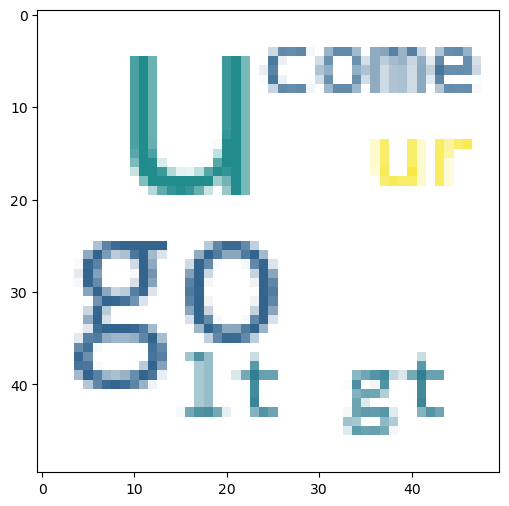

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
df[df['target']==1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [71]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
     for word in msg.split():
        spam_corpus.append(word)

In [72]:
len(spam_corpus)

9939

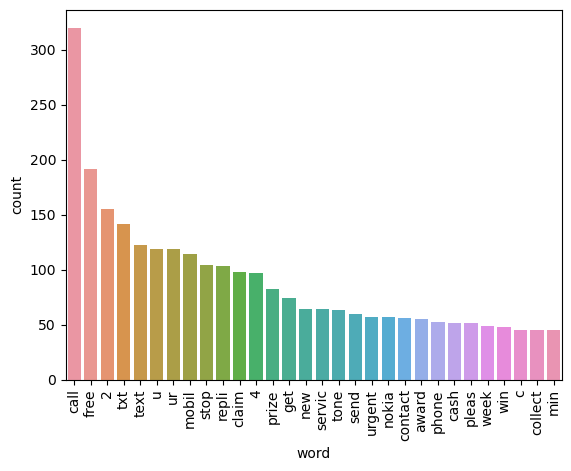

In [73]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

spam_counter = Counter(spam_corpus)


most_common_words = spam_counter.most_common(30)


if most_common_words:
    
    common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

    
    sns.barplot(x='word', y='count', data=common_df)
    plt.xticks(rotation='vertical')
    plt.show()
else:
    print("The spam_corpus is empty or does not contain sufficient data.")


In [74]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
len(ham_corpus)

35404

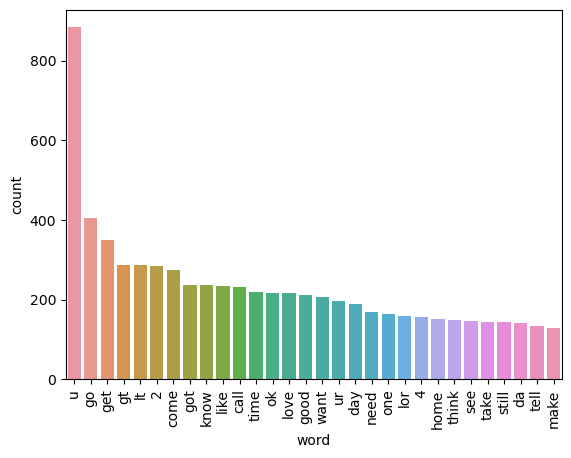

In [76]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ham_counter = Counter(ham_corpus)


most_common_words = ham_counter.most_common(30)


if most_common_words:
    
    common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

    
    sns.barplot(x='word', y='count', data=common_df)
    plt.xticks(rotation='vertical')
    plt.show()
else:
    print("The spam_corpus is empty or does not contain sufficient data.")

Model Building

In [77]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# //ACuuracy utni  ahi aa rahi thi countvectorizer se thats why hamne Tfidfvectorizer use kara hain yaha par
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [79]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [80]:
X.shape

(5169, 6708)

In [81]:
y=df['target'].values

In [82]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [87]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [88]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# Precision here is 100% it is 1 

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [89]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [90]:
# tfidf --> MNB

In [91]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define classifiers in a dictionary
clf= {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}


In [94]:
def train_classifier(clfs,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Instantiate the classifier if clf is a class
    if isinstance(clf, type):
        clf = clf()
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    return accuracy, precision

# Example classifiers dictionary
clfs = {
    'SVC': SVC,
    'Random Forest': RandomForestClassifier
}

# Initialize lists to store scores
accuracy_scores = []
precision_scores = []

# Loop through classifiers and train them
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9661508704061895
Precision -  0.9666577568841526
For  Random Forest
Accuracy -  0.971953578336557
Precision -  0.9725104690642599


In [102]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

# Define your classifiers
classifiers = {
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Collect accuracy and precision scores
accuracy_scores = []
precision_scores = []
classifier_names = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the classifier
    y_pred = clf.predict(X_test)  # Predict on the test set
    accuracy_scores.append(accuracy_score(y_test, y_pred))  # Collect accuracy
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))  # Collect precision
    classifier_names.append(name)  # Collect classifier name

# Create a DataFrame to store performance metrics
performance_df = pd.DataFrame({
    'Algorithm': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

# Display the DataFrame
print(performance_df)



       Algorithm  Accuracy  Precision
1  Random Forest  0.975822   0.976478
0            SVC  0.966151   0.966658


In [103]:
performance_df

,Algorithm,Accuracy,Precision
1,Random Forest,0.975822,0.976478
0,SVC,0.966151,0.966658


In [104]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset and split into training and testing sets
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers in a dictionary
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Define the function to train and evaluate classifiers
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    """
    Train multiple classifiers and evaluate their accuracy and precision.
    
    Parameters:
    clfs: Dictionary of classifier names and instances
    X_train: Training feature data
    y_train: Training labels
    X_test: Test feature data
    y_test: Test labels
    
    Returns:
    results: Dictionary of classifier names and their performance metrics
    """
    results = {}
    for name, clf in clfs.items():
        clf.fit(X_train, y_train)  # Fit the classifier
        y_pred = clf.predict(X_test)  # Make predictions
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        precision = precision_score(y_test, y_pred, average='weighted')  # Calculate precision
        results[name] = {"Accuracy": accuracy, "Precision": precision}  # Store results
    return results

# Train and evaluate all classifiers
results = train_classifier(classifiers, X_train, y_train, X_test, y_test)

# Print the results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.2f}, Precision = {metrics['Precision']:.2f}")


Logistic Regression: Accuracy = 1.00, Precision = 1.00
Support Vector Classifier: Accuracy = 1.00, Precision = 1.00
Multinomial Naive Bayes: Accuracy = 0.96, Precision = 0.96
Decision Tree: Accuracy = 1.00, Precision = 1.00
K-Nearest Neighbors: Accuracy = 1.00, Precision = 1.00
Random Forest: Accuracy = 1.00, Precision = 1.00
AdaBoost: Accuracy = 1.00, Precision = 1.00
Bagging: Accuracy = 1.00, Precision = 1.00
Extra Trees: Accuracy = 1.00, Precision = 1.00
Gradient Boosting: Accuracy = 1.00, Precision = 1.00
XGBoost: Accuracy = 1.00, Precision = 1.00


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,Random Forest,Accuracy,0.975822
1,SVC,Accuracy,0.966151
2,Random Forest,Precision,0.976478
3,SVC,Precision,0.966658


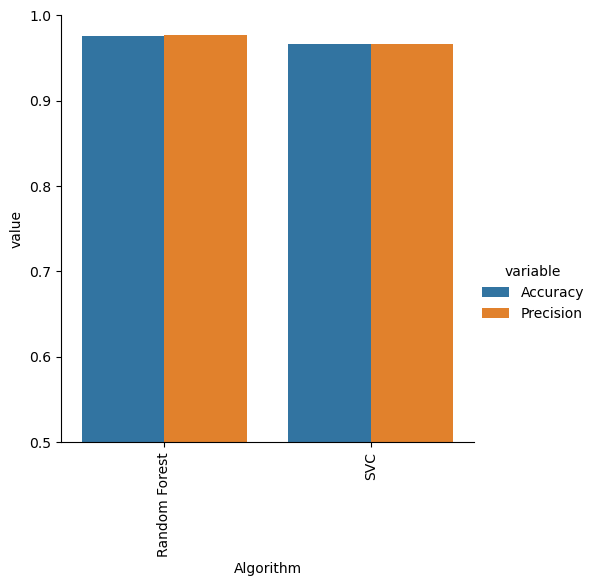

In [108]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [110]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define classifiers
clfs = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Example scores (replace with your actual calculations)
accuracy_scores = [0.85, 0.90, 0.88]  # Example accuracy scores
precision_scores = [0.80, 0.89, 0.87]  # Example precision scores

# Create the DataFrame
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

print(temp_df)


             Algorithm  Accuracy_max_ft_3000  Precision_max_ft_3000
1        Random Forest                  0.90                   0.89
2                  SVM                  0.88                   0.87
0  Logistic Regression                  0.85                   0.80


In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [112]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [113]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [115]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,Random Forest,0.975822,0.976478,0.9,0.89,0.9,0.89,0.9,0.89


### Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [116]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the models
svc = SVC(probability=True)  # Required for soft voting
mnb = MultinomialNB()
etc = ExtraTreesClassifier()

# Create the VotingClassifier
voting = VotingClassifier(estimators=[
    ('svm', svc),
    ('nb', mnb),
    ('et', etc)
], voting='soft')

print(voting)


VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier())],
                 voting='soft')


In [117]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier())],
                 voting='soft')

In [118]:
from sklearn.metrics import accuracy_score, precision_score

# Predictions from the voting classifier
y_pred = voting.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision with an appropriate average method
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted', 'macro', or 'micro' as needed
print("Precision:", precision)


Accuracy: 1.0
Precision: 1.0


In [119]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [120]:
from sklearn.ensemble import StackingClassifier

In [121]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [122]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier  # Example classifier

# Example dataset split (replace with your actual dataset)
# X_train, X_test, y_train, y_test should be pre-defined

# Define the classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))  # Use appropriate average


Accuracy: 1.0
Precision: 1.0


In [123]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))